# IPython Notebook for generating plots from "Machine-learned and codified synthesis parameters of oxide materials"

In this notebook, we provide the code used to generate the plots presented in the article, **Machine-learned and codified synthesis parameters of oxide materials** in the journal *Scientific Data*, published by Nature Research. All code is written in Python 2, using standard open-source numerical and scientific Python libraries.


**BEFORE YOU START THIS TUTORIAL**

Make sure you either have **Python** installed on your machine and follow along by copying the code into a Python text file, **OR**, have **Jupyter** installed and download this file, then run the entire notebook.

## Importing libraries

**Run the next two blocks and make sure they run without crashing.** If they don't run properly, it likely means that you don't have the proper python libraries installed. You can remedy this on most systems by opening a **command terminal** and typing the following command:

    $ pip install [library name]

For example, if you are missing the `pandas` library, you would simply type:

    $ pip install pandas

In [1]:
#Force in-line plotting

%matplotlib inline

In [3]:
#Import plotting libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

## Loading the JSON data file

The JSON data file is presented with the article and is available online at **https://figshare.com/s/5ff207b4c094d698ebc0**. 

To generate plots using this data file, you'll have to download a copy and then set the path to the file in the following block of code.

In [4]:
### CHANGE THIS FILE PATH TO POINT TO THE JSON FILE ###

FILE_PATH = '/PATH_TO_YOUR_JSON_FILE/material_synthesis_data.json'

In [5]:
#Load the JSON file provided in the article.
raw_json = json.loads(open(FILE_PATH, 'rb').read())

In [6]:
#Now we load the JSON file into a Python object

processed_json = []
for record in raw_json:
    processed_json.append(json.loads(record))

In [7]:
#Total number of papers

print sum(row['num_papers'] for row in processed_json)

76334


In [8]:
#Breakdown of papers per material 

for row in processed_json:
    print row['name'], row['num_papers']

ZnO 11348
TiO2 18716
BaTiO3 1245
V2O5 1577
MnO2 2348
LiFePO4 1447
LiMn2O4 792
BiFeO3 795
Al2O3 10253
ZrO2 3909
SnO2 2916
Fe3O4 2278
Fe2O3 2883
CuO 2438
Cu2O 976
NiO 2813
CoO 895
MgO 3313
MoO2 322
MoO3 1152
Li4Ti5O12 624
CeO 290
LaMnO3 210
BiVO4 240
NiCo2O4 210
LiCoO2 924
LiV3O8 90
PbTiO3 364
SrTiO3 896
PbZrO3 70


In [9]:
#We compile the computed (via Latent Dirichlet Allocation) topic distrubtions into a spreadsheet

topic_table = []
for row in processed_json:
    topic_table_row = {}
    topic_table_row['Material System'] = row['name']
    for topic in row['topics']:
        topic_table_row[topic] = row['topics'][topic]
    topic_table.append(topic_table_row)
    
topic_df = pd.DataFrame(topic_table)
topic_df = topic_df.set_index('Material System')
topic_df = topic_df.fillna(0)

In [10]:
#What does the topic distribution look like?
topic_df

,"acid, platinum, nanoparticle","activity, photocatalytic, light","alumina, emission, impact","anatase, cycle, column","approach, order, disperse","behaviour, chloride, content","calcium, enhancement, vanadium","carbon, nanotube, support","cell, human, induce","cement, rate, like",...,"system, charge, paste","technique, reactor, mixed","temperature, room, nanotubes","thermal, conductivity, hollow","tio2, nano, bond","transition, substrate, phase","treatment, facile, theory","xmlns, slag, range","yttrium, molten, elevated","zeolite, site, cast"
Material System,,,,,,,,,,,,,,,,,,,,,
ZnO,0.007700,0.026332,0.006325,0.002945,0.003045,0.006452,0.005615,0.014768,0.003272,0.008906,...,0.003026,0.006314,0.011013,0.009428,0.009882,0.014204,0.007696,0.003516,0.002000,0.003027
TiO2,0.009306,0.061751,0.005479,0.010136,0.003628,0.006831,0.005085,0.032020,0.003985,0.004836,...,0.004367,0.006418,0.007197,0.007752,0.061334,0.005956,0.008469,0.002758,0.002392,0.004414
BaTiO3,0.004912,0.005892,0.003969,0.002237,0.003416,0.003537,0.006840,0.008323,0.002608,0.002941,...,0.003264,0.005208,0.007110,0.006841,0.014717,0.016022,0.003220,0.002109,0.003904,0.008167
V2O5,0.006674,0.014085,0.013816,0.003505,0.001964,0.004964,0.031224,0.022661,0.001780,0.004958,...,0.004054,0.008882,0.008081,0.042121,0.007797,0.008433,0.004708,0.001383,0.002952,0.003687
MnO2,0.006338,0.009224,0.004441,0.002353,0.003259,0.007544,0.002536,0.037428,0.002803,0.008444,...,0.004774,0.004729,0.005660,0.009074,0.007228,0.003657,0.011722,0.002579,0.002377,0.004195
LiFePO4,0.002964,0.006449,0.003191,0.003714,0.003753,0.004453,0.004439,0.026730,0.006068,0.012700,...,0.007351,0.004196,0.004249,0.008606,0.012552,0.003539,0.006966,0.005471,0.003940,0.002146
LiMn2O4,0.003445,0.005748,0.002509,0.004994,0.002733,0.003951,0.002583,0.016101,0.003440,0.009413,...,0.011709,0.006978,0.003625,0.007590,0.010197,0.006140,0.003688,0.004866,0.005919,0.002121
BiFeO3,0.006826,0.019918,0.003706,0.001702,0.001551,0.001731,0.005239,0.007263,0.000607,0.002848,...,0.004621,0.006111,0.010370,0.006052,0.004634,0.017837,0.004234,0.001197,0.000685,0.003917
Al2O3,0.009855,0.010629,0.018892,0.002845,0.003133,0.007020,0.004147,0.029311,0.002632,0.005101,...,0.004982,0.013064,0.014111,0.014019,0.009465,0.006721,0.005507,0.004900,0.003883,0.009393


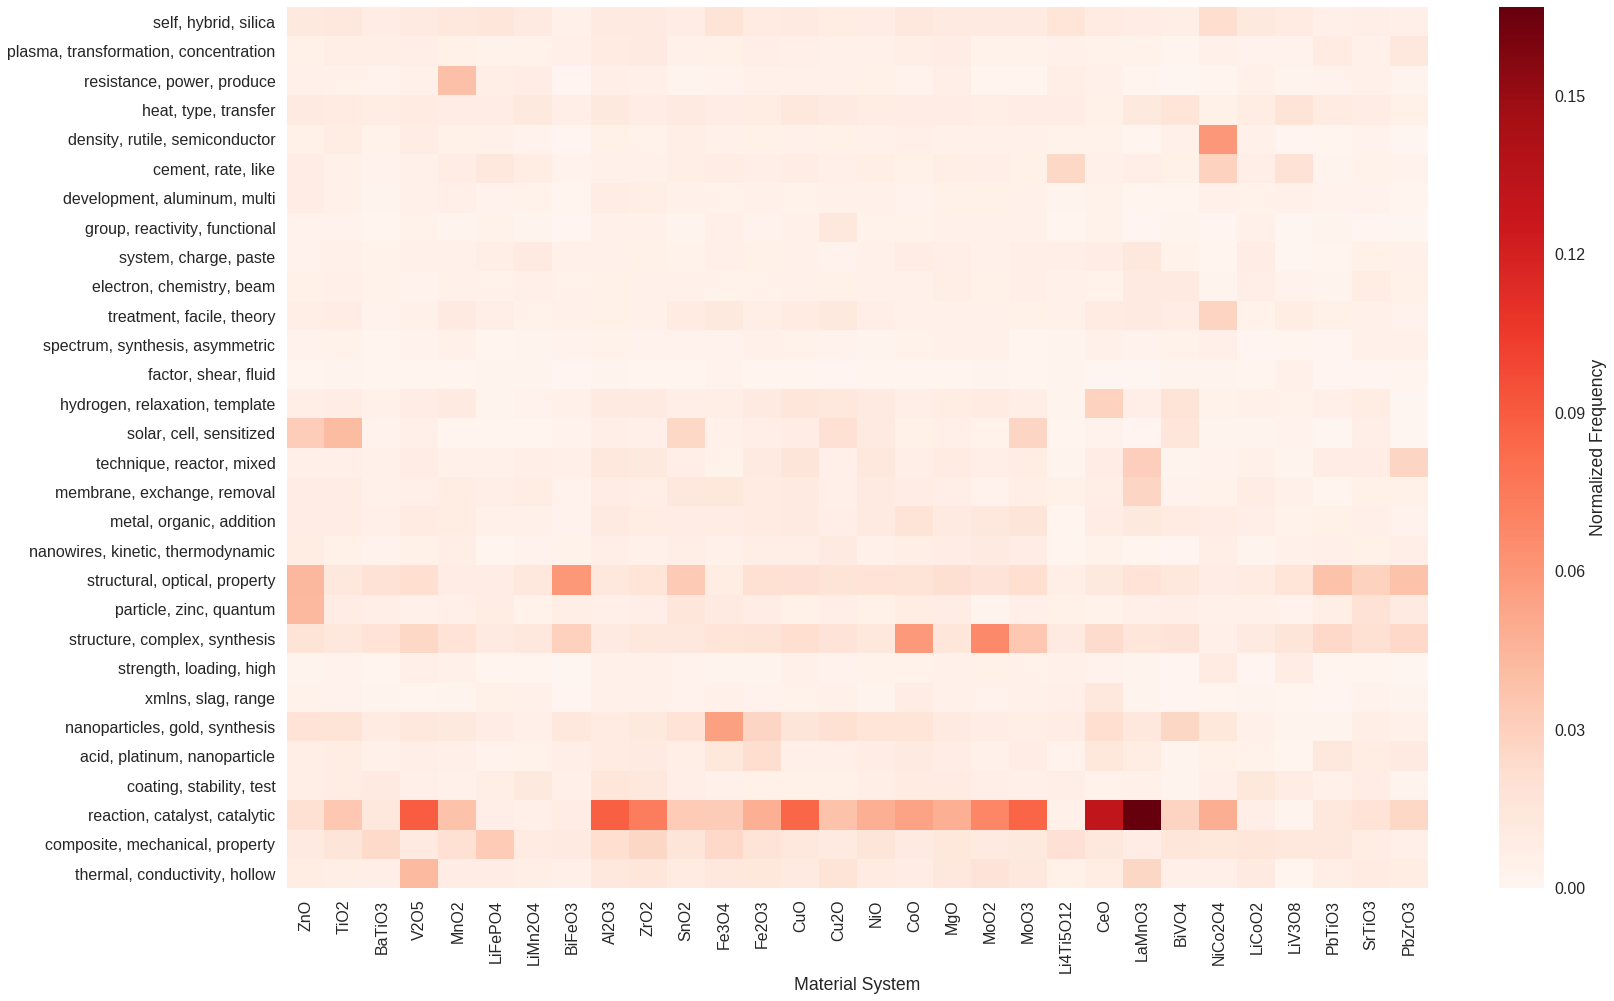

In [11]:
#Now we display a heatmap figure of the topic distributions

plt.figure(figsize=(24, 14))
sns.set_style('white')
sns.set_context("poster")
sns.heatmap(topic_df.transpose().sample(n=30, axis=0), cmap="Reds", cbar_kws={"label":"Normalized Frequency"})
plt.tight_layout()

In [12]:
#We pick the second record in the JSON file (since it starts as a 0-indexed array)

active_key = 1

In [13]:
#Print out the name and data fields

print processed_json[active_key]['name']
print processed_json[active_key].keys()

TiO2
[u'temperature_kde', u'calcine_kde', u'hydrothermal_kde', u'name', u'topics', u'associated_materials', u'num_papers', u'associated_operations']


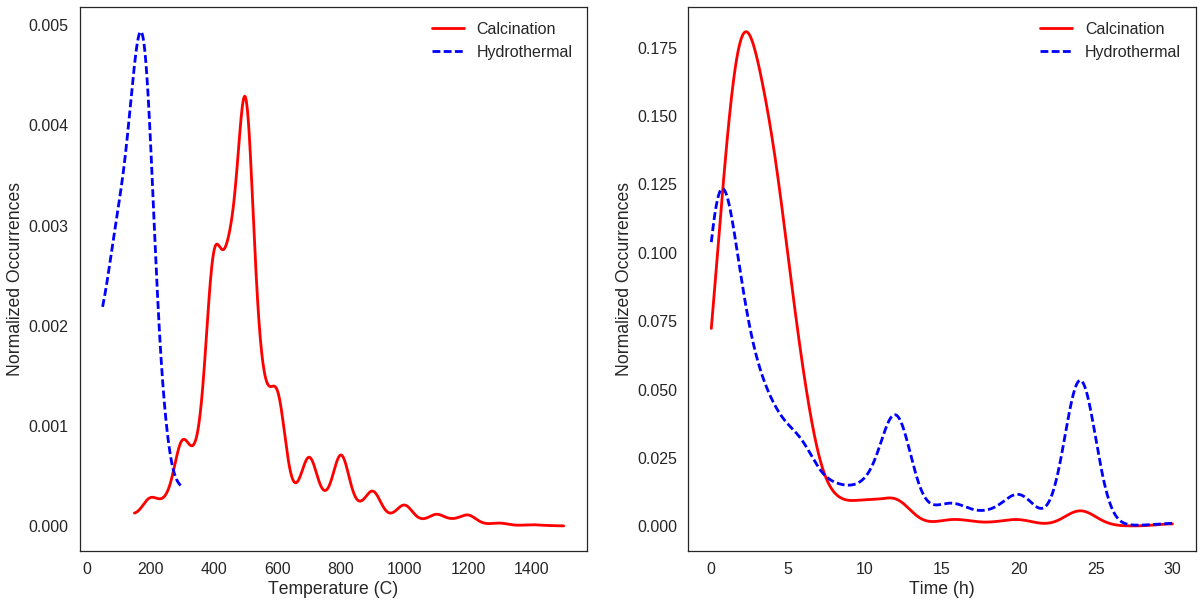

In [14]:
#Generate a plot for hydrothermal and calcination conditions

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(
    processed_json[active_key]['calcine_kde']['temperatures'], 
    processed_json[active_key]['calcine_kde']['temperature_frequencies'],
    c='red',
    label='Calcination'
)
ax1.plot(
    processed_json[active_key]['hydrothermal_kde']['temperatures'], 
    processed_json[active_key]['hydrothermal_kde']['temperature_frequencies'],
    c='blue',
    ls='--',
    label='Hydrothermal'
)
ax1.set_ylabel('Normalized Occurrences')
ax1.set_xlabel('Temperature (C)')
ax1.legend()

ax2.plot(
    processed_json[active_key]['calcine_kde']['times'], 
    processed_json[active_key]['calcine_kde']['time_frequencies'],
    c='red',
    label='Calcination'
)
ax2.plot(
    processed_json[active_key]['hydrothermal_kde']['times'], 
    processed_json[active_key]['hydrothermal_kde']['time_frequencies'],
    c='blue',
    ls='--',
    label='Hydrothermal'
)
ax2.set_ylabel('Normalized Occurrences')
ax2.set_xlabel('Time (h)')
ax2.legend()

In [17]:
#We make a spreadsheet for the associated materials (i.e. co-occurring in synthesis with a target synthesized material)

topic_table = []
for row in processed_json:
    topic_table_row = {}
    topic_table_row['Material System'] = row['name']
    for topic in row['associated_materials']:
        topic_table_row[topic] = row['associated_materials'][topic]
    topic_table.append(topic_table_row)
    
topic_df = pd.DataFrame(topic_table)
topic_df = topic_df.set_index('Material System')
topic_df = topic_df.fillna(0)

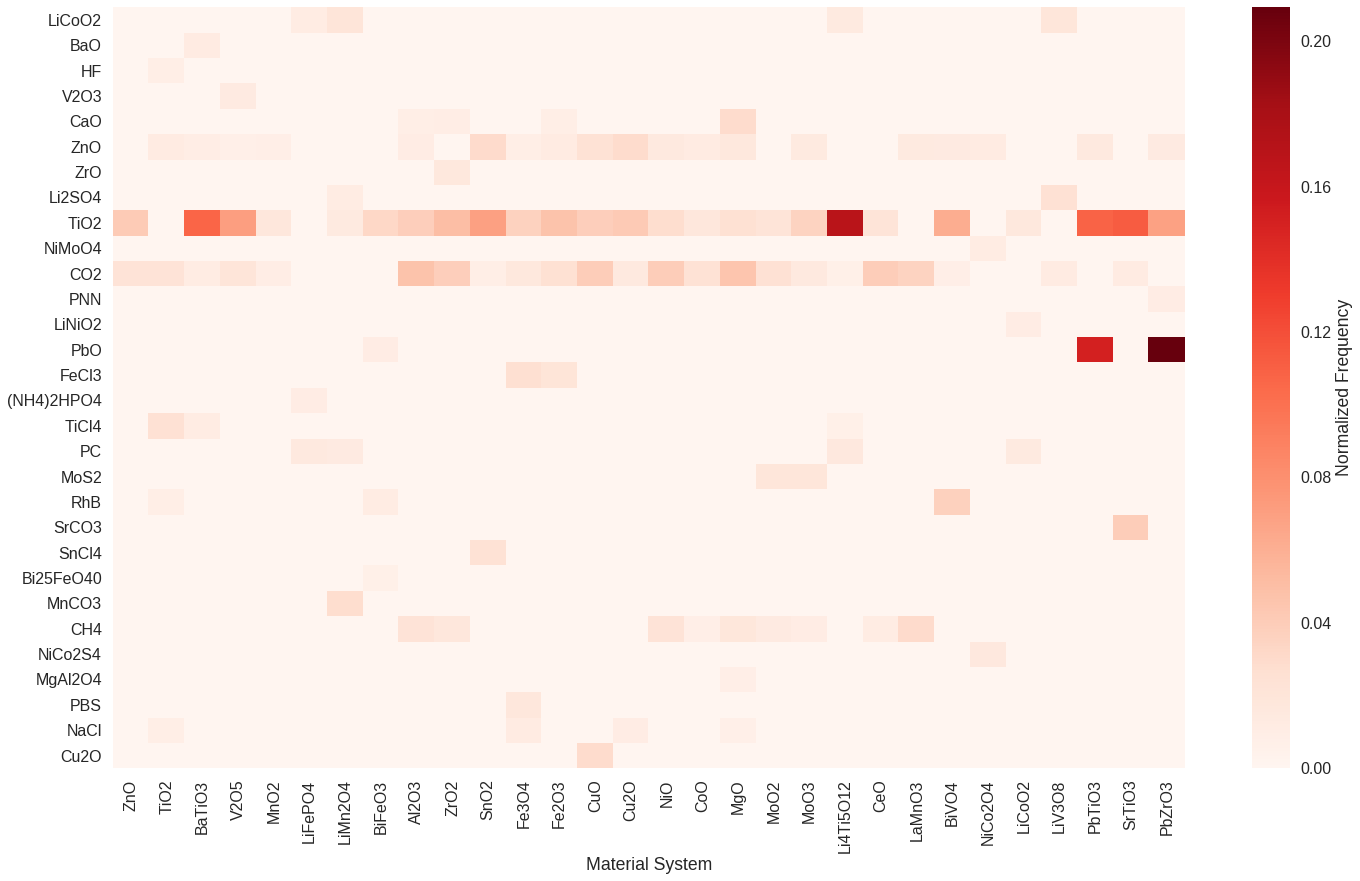

In [22]:
#We plot the spreadsheet as a heatmap. Self-counts (exact string matches) show up as zero by default in the raw data,
#(otherwise self-counts would trivially dominate and wash-out all other occurrence counts)
#We also choose a random subsample along the Y-axis, because otherwise this heatmap would be too large to practically read.

plt.figure(figsize=(24, 14))
plt.xticks(rotation=90)
sns.set_style('white')
sns.set_context("poster")
sns.heatmap(topic_df.transpose().sample(n=30, axis=0), cmap="Reds", cbar_kws={"label":"Normalized Frequency"})

## Training Curves for Word Label Classifiers

The raw data and code to generate the training curve plots are included below. For brevity, we simply include the measured metrics as numbers in this notebook, and we then use those numbers to generate the figure.

In [23]:
rule_acc = 0.77619893 #Accuracy of the baseline neural net based on deterministic rule-applied labels
rule_f1 = 0.65672792 #F1 score of the same as above
 
tc_toks = [10, 100, 1000, 2500, 5253] # Number of labelled tokens used in training the human-trained neural net

tc_accs = [0.2, 0.69, 0.809, 0.85079929, 0.86204855] #Accuracy of the human-trained neural net
tc_f1s = [0, 0.60571425, 0.74980774, 0.79588626, 0.81081312] #F1 score of the same as above

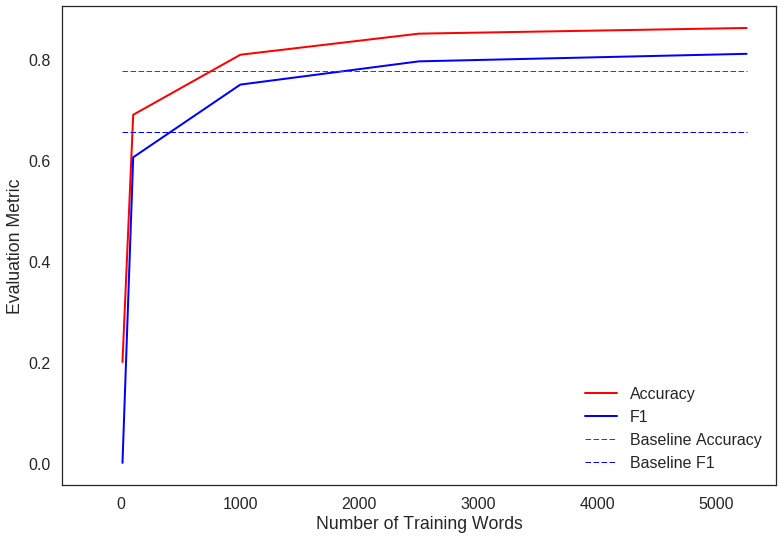

In [24]:
#Below, we use calls to the Matplotlib library to generate a line plot of the training curves

plt.xlabel('Number of Training Words')
plt.ylabel('Evaluation Metric')
plt.plot(tc_toks, tc_accs, label='Accuracy', c='red', lw=2)
plt.plot(tc_toks, tc_f1s, label='F1', c='blue', lw=2)
plt.plot(tc_toks, [rule_acc]*5, label='Baseline Accuracy', c='red', lw=1, ls='--')
plt.plot(tc_toks, [rule_f1]*5, label='Baseline F1', c='blue', lw=1, ls='--')
plt.xlim(-500, 5500)
plt.legend(loc=4)